<style>
h1 {
    border-bottom: 2px solid;
}
h2 {
    border-bottom: 1px solid;
}
/* hr {
    border-top: 2px solid;
    border-bottom: none;
} */
.student-info {
    text-align: right;
    border-bottom: none;
}
hr.double-div {
    border-top: 2px solid;
    border-bottom: 2px solid;
    border-left: none;
    border-right: none;
    height: 10pt;
    /* border-radius: 1px; */
}
blockquote {
    border-left: 2px solid;
    /* background-color: #00000488; */
    /* filter: brightness(80%); */
    margin-left: 2em;
    margin-right: 2em;
    padding: 1px 2px 1px 1em;
}
pre {
    border: 1px solid #88888888;
    margin-left: 1em;
    margin-right: 1em;
    padding: 0.5em;
    /*padding: 8pt 1em 8pt 1em;*/
}
blockquote > pre {
    margin-left: 0.5em;
}
img {
    display: block;
    margin-left: auto;
    margin-right: auto;
}
</style>

<h2 class="student-info">
    Andrew Osterhout <br/>
    (u1317172)
</h2>

# Asg-9 template

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.Def_PDA    import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


# Problem 6, Page 159, the "OR" case.
## Test your CFG below for 

$ \{ a^i c^k b^j d^l \;:\; (i==j)\; OR\; (k==l)\}$

## Note that for the CFG that is to be simulated using Jove's PDA, the nonterminals must be only a single letter (i.e. if you used a nonterminals "As" for one or more a, and you pushed As on the stack, it will be interpreted as "A" followed by "s").

In [2]:
# Type the CFG in the comments of the PDA
# Then convert to PDA and run the tests below

pda_acbd = md2mc(
'''
PDA

!!---Initially I'll write using multi-letter nonterminals...
!!   Then I'll turn them into single-letter nonterminals.
!!
!! S        ->  i_EQ_j | k_EQ_l | ε
!! i_EQ_j   ->  a i_EQ_j b D | C
!! k_EQ_l   ->  A c k_EQ_l D | B 
!! A        ->  a A | ε
!! B        ->  b B | ε
!! C        ->  c C | ε
!! D        ->  d D | ε


!!---Now turning into single-letter non-terminals
!!---To avoid the dual-use of "S", the second use is "Z"
!!
!! S    ->  J | K | ε
!! J    ->  a J b D | C
!! K    ->  A c K D | B 
!! A    ->  a A | ε
!! B    ->  b B | ε
!! C    ->  c C | ε
!! D    ->  d D | ε


!!=== PDA below ======================================

!!-- Initial State & Setup -------------
IF  : '','' ; S     -> M


!!-- Set up Paths for Grammers ---------
!!- S / "starting" grammar -
M   : '',S  ; J     -> M
M   : '',S  ; K     -> M
M   : '',S  ; ''    -> M

!!- J / i_EQ_j grammar -----
M   : '',J  ; aJbD  -> M
M   : '',J  ; C     -> M

!!- K / k_EQ_l grammar -----
M   : '',K  ; AcKd  -> M
M   : '',K  ; B     -> M

!!- A gramer ---------------
M   : '',A  ; aA    -> M
M   : '',A  ; ''    -> M

!!- B gramer ---------------
M   : '',B  ; bB    -> M
M   : '',B  ; ''    -> M

!!- C gramer ---------------
M   : '',C  ; cC    -> M
M   : '',C  ; ''    -> M

!!- D gramer ---------------
M   : '',D  ; dD    -> M
M   : '',D  ; ''    -> M


!!-- Setup paths for string processing --
M   : a,a   ; ''    -> M
M   : b,b   ; ''    -> M
M   : c,c   ; ''    -> M
M   : d,d   ; ''    -> M


!!-- Final Acceptance Condition ---------
M   : '',#  ; #     -> F

''')

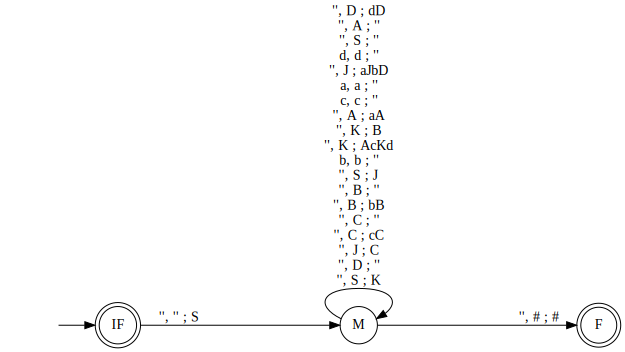

In [3]:
dotObj_pda(pda_acbd, FuseEdges=True)

In [4]:
explore_pda("acbd", pda_acbd)   # ACCEPT

String acbd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'acbd', '#')
->  ('M', 'acbd', 'S#')
->  ('M', 'acbd', 'J#')
->  ('M', 'acbd', 'aJbD#')
->  ('M', 'cbd', 'JbD#')
->  ('M', 'cbd', 'CbD#')
->  ('M', 'cbd', 'cCbD#')
->  ('M', 'bd', 'CbD#')
->  ('M', 'bd', 'bD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'acbd', '#')
->  ('M', 'acbd', 'S#')
->  ('M', 'acbd', 'K#')
->  ('M', 'acbd', 'AcKd#')
->  ('M', 'acbd', 'aAcKd#')
->  ('M', 'cbd', 'AcKd#')
->  ('M', 'cbd', 'cKd#')
->  ('M', 'bd', 'Kd#')
->  ('M', 'bd', 'Bd#')
->  ('M', 'bd', 'bBd#')
->  ('M', 'd', 'Bd#')
->  ('M', 'd', 'd#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [5]:
explore_pda("aacbbd", pda_acbd) # ACCEPT

String aacbbd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aacbbd', '#')
->  ('M', 'aacbbd', 'S#')
->  ('M', 'aacbbd', 'J#')
->  ('M', 'aacbbd', 'aJbD#')
->  ('M', 'acbbd', 'JbD#')
->  ('M', 'acbbd', 'aJbDbD#')
->  ('M', 'cbbd', 'JbDbD#')
->  ('M', 'cbbd', 'CbDbD#')
->  ('M', 'cbbd', 'cCbDbD#')
->  ('M', 'bbd', 'CbDbD#')
->  ('M', 'bbd', 'bDbD#')
->  ('M', 'bd', 'DbD#')
->  ('M', 'bd', 'bD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aacbbd', '#')
->  ('M', 'aacbbd', 'S#')
->  ('M', 'aacbbd', 'K#')
->  ('M', 'aacbbd', 'AcKd#')
->  ('M', 'aacbbd', 'aAcKd#')
->  ('M', 'acbbd', 'AcKd#')
->  ('M', 'acbbd', 'aAcKd#')
->  ('M', 'cbbd', 'AcKd#')
->  ('M', 'cbbd', 'cKd#')
->  ('M', 'bbd', 'Kd#')
->  ('M', 'bbd', 'Bd#')
->  ('M', 'bbd', 'bBd#')
->  ('M', 'bd', 'Bd#')
->  ('M', 'bd', 'bBd#')
->  ('M', 'd', 

In [6]:
explore_pda("aaaccbbbddd", pda_acbd)    # ACCEPT

String aaaccbbbddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaccbbbddd', '#')
->  ('M', 'aaaccbbbddd', 'S#')
->  ('M', 'aaaccbbbddd', 'J#')
->  ('M', 'aaaccbbbddd', 'aJbD#')
->  ('M', 'aaccbbbddd', 'JbD#')
->  ('M', 'aaccbbbddd', 'aJbDbD#')
->  ('M', 'accbbbddd', 'JbDbD#')
->  ('M', 'accbbbddd', 'aJbDbDbD#')
->  ('M', 'ccbbbddd', 'JbDbDbD#')
->  ('M', 'ccbbbddd', 'CbDbDbD#')
->  ('M', 'ccbbbddd', 'cCbDbDbD#')
->  ('M', 'cbbbddd', 'CbDbDbD#')
->  ('M', 'cbbbddd', 'cCbDbDbD#')
->  ('M', 'bbbddd', 'CbDbDbD#')
->  ('M', 'bbbddd', 'bDbDbD#')
->  ('M', 'bbddd', 'DbDbD#')
->  ('M', 'bbddd', 'bDbD#')
->  ('M', 'bddd', 'DbD#')
->  ('M', 'bddd', 'bD#')
->  ('M', 'ddd', 'D#')
->  ('M', 'ddd', 'dD#')
->  ('M', 'dd', 'D#')
->  ('M', 'dd', 'dD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [7]:
explore_pda("aaaacccbbbddd", pda_acbd)  # ACCEPT

String aaaacccbbbddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaacccbbbddd', '#')
->  ('M', 'aaaacccbbbddd', 'S#')
->  ('M', 'aaaacccbbbddd', 'K#')
->  ('M', 'aaaacccbbbddd', 'AcKd#')
->  ('M', 'aaaacccbbbddd', 'aAcKd#')
->  ('M', 'aaacccbbbddd', 'AcKd#')
->  ('M', 'aaacccbbbddd', 'aAcKd#')
->  ('M', 'aacccbbbddd', 'AcKd#')
->  ('M', 'aacccbbbddd', 'aAcKd#')
->  ('M', 'acccbbbddd', 'AcKd#')
->  ('M', 'acccbbbddd', 'aAcKd#')
->  ('M', 'cccbbbddd', 'AcKd#')
->  ('M', 'cccbbbddd', 'cKd#')
->  ('M', 'ccbbbddd', 'Kd#')
->  ('M', 'ccbbbddd', 'AcKdd#')
->  ('M', 'ccbbbddd', 'cKdd#')
->  ('M', 'cbbbddd', 'Kdd#')
->  ('M', 'cbbbddd', 'AcKddd#')
->  ('M', 'cbbbddd', 'cKddd#')
->  ('M', 'bbbddd', 'Kddd#')
->  ('M', 'bbbddd', 'Bddd#')
->  ('M', 'bbbddd', 'bBddd#')
->  ('M', 'bbddd', 'Bddd#')
->  ('M', 'bbddd', 'bBddd#')
->  ('M', 'bddd', 'Bddd#')
->  ('M', 'bddd', 'bBddd#')
->  ('M', 'ddd', 'Bddd#')
->  ('M', 'ddd', 'ddd#'

In [8]:
explore_pda("aaaacccbbbdddd", pda_acbd) # REJECT

String aaaacccbbbdddd rejected by your PDA :-(
Visited states are:
{('M', 'ddd', 'dDbD#'), ('M', 'cccbbbdddd', 'cKd#'), ('M', 'ccbbbdddd', 'bBd#'), ('M', 'ddd', 'bD#'), ('F', 'd', '#'), ('M', 'acccbbbdddd', 'aJbDbDbDbD#'), ('M', 'bbdddd', 'bBddd#'), ('M', 'bbbdddd', 'Kddd#'), ('M', 'cbbbdddd', 'Bdd#'), ('M', 'dddd', 'dDbD#'), ('M', 'bdddd', 'bBddd#'), ('M', 'd', '#'), ('M', 'cbbbdddd', 'AcKddd#'), ('M', 'aaaacccbbbdddd', 'S#'), ('M', '', 'dDbD#'), ('M', 'aaacccbbbdddd', 'aJbDbD#'), ('M', 'acccbbbdddd', 'CbDbDbD#'), ('M', 'aaaacccbbbdddd', 'aAcKd#'), ('M', '', 'bD#'), ('M', 'aaaacccbbbdddd', 'cKd#'), ('M', 'ccbbbdddd', 'cKdd#'), ('M', 'ccbbbdddd', 'Bd#'), ('M', 'bbbdddd', 'CbDbDbDbD#'), ('M', 'aaacccbbbdddd', 'cCbD#'), ('M', 'aacccbbbdddd', 'aAcKd#'), ('M', 'dd', 'd#'), ('M', 'cbbbdddd', 'dd#'), ('M', 'bbbdddd', 'AcKdddd#'), ('M', 'cccbbbdddd', 'cCbDbDbDbD#'), ('M', 'aacccbbbdddd', 'cKd#'), ('M', 'aaaacccbbbdddd', 'cC#'), ('M', 'bbbdddd', 'Bddd#'), ('M', 'dd', 'dDbD#'), ('M', 'bbbdddd',

In [9]:
explore_pda("aaaabbbb", pda_acbd)   # ACCEPT

String aaaabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaabbbb', '#')
->  ('M', 'aaaabbbb', 'S#')
->  ('M', 'aaaabbbb', 'J#')
->  ('M', 'aaaabbbb', 'aJbD#')
->  ('M', 'aaabbbb', 'JbD#')
->  ('M', 'aaabbbb', 'aJbDbD#')
->  ('M', 'aabbbb', 'JbDbD#')
->  ('M', 'aabbbb', 'aJbDbDbD#')
->  ('M', 'abbbb', 'JbDbDbD#')
->  ('M', 'abbbb', 'aJbDbDbDbD#')
->  ('M', 'bbbb', 'JbDbDbDbD#')
->  ('M', 'bbbb', 'CbDbDbDbD#')
->  ('M', 'bbbb', 'bDbDbDbD#')
->  ('M', 'bbb', 'DbDbDbD#')
->  ('M', 'bbb', 'bDbDbD#')
->  ('M', 'bb', 'DbDbD#')
->  ('M', 'bb', 'bDbD#')
->  ('M', 'b', 'DbD#')
->  ('M', 'b', 'bD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [10]:
explore_pda("aaaabbb", pda_acbd)    # REJECT

String aaaabbb rejected by your PDA :-(
Visited states are:
{('M', 'b', 'DbDbD#'), ('M', 'aaaabbb', 'S#'), ('M', 'aaaabbb', 'aJbD#'), ('M', 'aaabbb', 'aJbDbD#'), ('M', 'aaaabbb', 'aAcKd#'), ('M', 'aaabbb', 'cCbD#'), ('M', 'b', 'dDbDbD#'), ('M', 'abbb', 'JbDbDbD#'), ('M', 'aaaabbb', 'AcKd#'), ('M', 'bbb', 'bDbDbDbD#'), ('M', 'aaaabbb', 'cKd#'), ('M', 'bbb', 'JbDbDbDbD#'), ('M', 'abbb', 'bDbDbD#'), ('M', 'bb', 'dDbDbDbD#'), ('M', 'aaaabbb', 'cC#'), ('M', '', 'dDbD#'), ('M', 'aaabbb', 'CbD#'), ('M', 'bbb', 'aJbDbDbDbDbD#'), ('M', '', 'bD#'), ('M', 'abbb', 'cCbDbDbD#'), ('M', 'bbb', 'cCbDbDbDbD#'), ('M', 'aabbb', 'cCbDbD#'), ('M', 'aaaabbb', 'bB#'), ('M', 'aabbb', 'aAcKd#'), ('M', 'aaaabbb', 'C#'), ('M', 'aabbb', 'AcKd#'), ('M', 'abbb', 'aJbDbDbDbD#'), ('M', 'abbb', 'AcKd#'), ('M', 'bbb', 'CbDbDbDbD#'), ('M', 'aaabbb', 'AcKd#'), ('M', 'bb', 'DbDbDbD#'), ('M', 'aabbb', 'cKd#'), ('M', 'abbb', 'aAcKd#'), ('M', 'aaaabbb', 'B#'), ('M', 'aaabbb', 'aAcKd#'), ('M', 'abbb', 'cKd#'), ('M', 'aaabbb',

In [11]:
explore_pda("aaaabbbd", pda_acbd)   # REJECT

String aaaabbbd rejected by your PDA :-(
Visited states are:
{('M', 'aabbbd', 'aJbDbDbD#'), ('M', 'bd', 'bDbD#'), ('M', 'aaaabbbd', 'cKd#'), ('M', 'bbbd', 'aJbDbDbDbDbD#'), ('M', 'aabbbd', 'bDbD#'), ('M', 'abbbd', 'cCbDbDbD#'), ('M', 'aabbbd', 'CbDbD#'), ('M', 'bbbd', 'CbDbDbDbD#'), ('M', 'bbd', 'DbDbDbD#'), ('M', 'abbbd', 'aJbDbDbDbD#'), ('M', 'aabbbd', 'JbDbD#'), ('M', 'aaabbbd', 'aJbDbD#'), ('M', 'aaaabbbd', 'cC#'), ('M', 'bd', 'DbDbD#'), ('M', 'aaabbbd', 'cCbD#'), ('M', 'abbbd', 'aAcKd#'), ('M', 'abbbd', 'AcKd#'), ('M', 'bd', 'dDbDbD#'), ('M', 'aaaabbbd', 'C#'), ('M', 'abbbd', 'cKd#'), ('M', 'aaaabbbd', 'bB#'), ('M', 'bbbd', 'AcKd#'), ('M', '', 'dDbD#'), ('M', 'bbbd', 'aAcKd#'), ('IF', 'aaaabbbd', '#'), ('F', 'aaaabbbd', '#'), ('M', 'abbbd', 'CbDbDbD#'), ('M', '', 'bD#'), ('M', 'bbbd', 'cKd#'), ('M', 'aaabbbd', 'CbD#'), ('M', 'bbd', 'bDbDbD#'), ('M', 'aaaabbbd', '#'), ('M', 'aaaabbbd', 'J#'), ('M', 'aaabbbd', 'aAcKd#'), ('M', 'd', 'DbD#'), ('M', 'aaabbbd', 'AcKd#'), ('M', 'aabbbd',

In [12]:
explore_pda("aaaacbbb", pda_acbd)   # REJECT

String aaaacbbb rejected by your PDA :-(
Visited states are:
{('M', 'b', 'DbDbD#'), ('M', 'b', 'Bd#'), ('M', 'aaacbbb', 'aAcKd#'), ('M', 'aaacbbb', 'AcKd#'), ('M', 'aaacbbb', 'cKd#'), ('M', 'b', 'dDbDbD#'), ('M', 'aaaacbbb', 'K#'), ('M', 'aaaacbbb', 'B#'), ('M', 'bbb', 'bDbDbDbD#'), ('M', '', 'd#'), ('M', 'cbbb', 'bDbDbDbD#'), ('M', 'aaaacbbb', 'S#'), ('M', 'acbbb', 'JbDbDbD#'), ('M', 'bbb', 'Kd#'), ('M', 'bbb', 'cKdd#'), ('M', 'cbbb', 'JbDbDbDbD#'), ('M', 'aaaacbbb', 'aJbD#'), ('M', 'aaaacbbb', 'aAcKd#'), ('M', '', 'dDbD#'), ('M', 'aaaacbbb', 'AcKd#'), ('M', '', 'bD#'), ('M', 'cbbb', 'aJbDbDbDbDbD#'), ('M', 'bbb', 'cCbDbDbDbD#'), ('M', 'aacbbb', 'JbDbD#'), ('M', 'aaaacbbb', 'cC#'), ('M', 'acbbb', 'aJbDbDbDbD#'), ('M', 'bbb', 'AcKdd#'), ('M', 'acbbb', 'AcKd#'), ('M', 'aaaacbbb', 'bB#'), ('M', 'aaaacbbb', 'C#'), ('M', 'b', 'd#'), ('M', 'aaacbbb', 'cCbD#'), ('IF', 'aaaacbbb', '#'), ('M', 'cbbb', 'aAcKd#'), ('M', 'acbbb', 'CbDbDbD#'), ('M', 'cbbb', 'cKd#'), ('M', 'aaacbbb', 'CbD#'), ('M',

## Now, provide five of your own tests and run them; cover more interesting cases that are likely not covered by the above tests (or if covered, try to find new variations with respect to the numbers of various symbols.

In [13]:
explore_pda("", pda_acbd)   # ACCEPT

String  accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', '', '#')
->  ('M', '', 'S#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [18]:
explore_pda("aaaaaaaaccccccccccbbbbbbbbdddddddddd", pda_acbd)   # ACCEPT

String aaaaaaaaccccccccccbbbbbbbbdddddddddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaaaaaaccccccccccbbbbbbbbdddddddddd', '#')
->  ('M', 'aaaaaaaaccccccccccbbbbbbbbdddddddddd', 'S#')
->  ('M', 'aaaaaaaaccccccccccbbbbbbbbdddddddddd', 'J#')
->  ('M', 'aaaaaaaaccccccccccbbbbbbbbdddddddddd', 'aJbD#')
->  ('M', 'aaaaaaaccccccccccbbbbbbbbdddddddddd', 'JbD#')
->  ('M', 'aaaaaaaccccccccccbbbbbbbbdddddddddd', 'aJbDbD#')
->  ('M', 'aaaaaaccccccccccbbbbbbbbdddddddddd', 'JbDbD#')
->  ('M', 'aaaaaaccccccccccbbbbbbbbdddddddddd', 'aJbDbDbD#')
->  ('M', 'aaaaaccccccccccbbbbbbbbdddddddddd', 'JbDbDbD#')
->  ('M', 'aaaaaccccccccccbbbbbbbbdddddddddd', 'aJbDbDbDbD#')
->  ('M', 'aaaaccccccccccbbbbbbbbdddddddddd', 'JbDbDbDbD#')
->  ('M', 'aaaaccccccccccbbbbbbbbdddddddddd', 'aJbDbDbDbDbD#')
->  ('M', 'aaaccccccccccbbbbbbbbdddddddddd', 'JbDbDbDbDbD#')
->  ('M', 'aaaccccccccccbbbbbbbbdddddddddd', 'aJbDbDbDbDbDbD#')
->  ('M', 'aaccccccc

In [15]:
explore_pda("dbca", pda_acbd)   # REJECT

String dbca rejected by your PDA :-(
Visited states are:
{('M', 'dbca', 'bB#'), ('M', 'dbca', 'C#'), ('M', 'dbca', 'J#'), ('M', 'dbca', 'B#'), ('M', 'dbca', 'K#'), ('M', 'dbca', '#'), ('F', 'dbca', '#'), ('M', 'dbca', 'S#'), ('M', 'dbca', 'cC#'), ('M', 'dbca', 'aJbD#'), ('M', 'dbca', 'AcKd#'), ('M', 'dbca', 'aAcKd#'), ('IF', 'dbca', '#'), ('M', 'dbca', 'cKd#')}


In [16]:
explore_pda("aaabbbcccddd", pda_acbd)   # REJECT

String aaabbbcccddd rejected by your PDA :-(
Visited states are:
{('M', 'cccddd', '#'), ('M', 'aaabbbcccddd', 'aJbD#'), ('M', 'aabbbcccddd', 'CbD#'), ('M', 'aaabbbcccddd', 'S#'), ('M', 'bcccddd', 'DbD#'), ('M', 'bbcccddd', 'bDbD#'), ('M', 'aaabbbcccddd', 'AcKd#'), ('M', 'cccddd', 'D#'), ('M', 'aaabbbcccddd', 'aAcKd#'), ('M', 'aaabbbcccddd', 'cKd#'), ('M', 'aabbbcccddd', 'aAcKd#'), ('M', 'bbcccddd', 'DbDbD#'), ('M', 'aabbbcccddd', 'AcKd#'), ('M', 'bbbcccddd', 'JbDbDbD#'), ('M', 'aabbbcccddd', 'cKd#'), ('M', 'aaabbbcccddd', 'cC#'), ('M', 'bbcccddd', 'dDbDbD#'), ('M', 'bcccddd', 'dDbD#'), ('M', 'bbbcccddd', 'bDbDbD#'), ('M', 'abbbcccddd', 'cCbDbD#'), ('M', 'aaabbbcccddd', 'bB#'), ('M', 'abbbcccddd', 'aAcKd#'), ('M', 'bcccddd', 'bD#'), ('M', 'abbbcccddd', 'AcKd#'), ('M', 'aaabbbcccddd', 'C#'), ('M', 'aabbbcccddd', 'JbD#'), ('M', 'abbbcccddd', 'cKd#'), ('M', 'aabbbcccddd', 'bD#'), ('M', 'bbbcccddd', 'cCbDbDbD#'), ('M', 'bbbcccddd', 'aJbDbDbDbD#'), ('IF', 'aaabbbcccddd', '#'), ('M', 'bbbcccd

In [17]:
explore_pda("ddbbbccaaa", pda_acbd) # REJECT

String ddbbbccaaa rejected by your PDA :-(
Visited states are:
{('M', 'ddbbbccaaa', 'aAcKd#'), ('M', 'ddbbbccaaa', 'bB#'), ('M', 'ddbbbccaaa', 'C#'), ('M', 'ddbbbccaaa', 'cKd#'), ('M', 'ddbbbccaaa', 'B#'), ('M', 'ddbbbccaaa', 'K#'), ('M', 'ddbbbccaaa', '#'), ('M', 'ddbbbccaaa', 'J#'), ('M', 'ddbbbccaaa', 'aJbD#'), ('F', 'ddbbbccaaa', '#'), ('M', 'ddbbbccaaa', 'S#'), ('M', 'ddbbbccaaa', 'cC#'), ('IF', 'ddbbbccaaa', '#'), ('M', 'ddbbbccaaa', 'AcKd#')}


# Asg9 DTM for $w\#x$ where $w$ is a substring of $x$

In [ ]:
Asg9DTM = md2mc('''
TM     



''')


# Tests for the DTM

### (a) aba#aba – pass 
### (b) aba#ab – fail
### (c) aba#baba – pass 
### (d) aba#babba –fail
### (e) bba#bbabba – pass


## Please include five more tests of your own

In [ ]:
help(explore_tm)

In [ ]:
explore_tm(Asg9DTM, "aba#aba",50)

In [ ]:
explore_tm(Asg9DTM, "aba#ab",50)

In [ ]:
explore_tm(Asg9DTM, "aba#baba",50)

In [ ]:
explore_tm(Asg9DTM, "aba#babba",50)

In [ ]:
explore_tm(Asg9DTM, "bba#bbabba",50)

# Asg9 NDTM for w#x where w is a substring of x

In [ ]:
# w#x NDTM
 

Asg9NDTM = md2mc('''TM
  
 

''')



In [ ]:
explore_tm(Asg9NDTM, "aba#aba",50)

In [ ]:
explore_tm(Asg9NDTM, "aba#ab",50)

In [ ]:
explore_tm(Asg9NDTM, "aba#baba",50)

In [ ]:
explore_tm(Asg9NDTM, "aba#babba",50)

In [ ]:
explore_tm(Asg9NDTM, "bba#bbabba",50)

# END